In [1]:
%matplotlib nbagg
import numpy as np
import json
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy.special import erf
from scipy.optimize import curve_fit
import os

/sf/alvra/anaconda/4.4.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# only through raw and JF

channel_PIPS_trans = "data/SARES11-GES1:CH1_VAL_GET/data"           #X-ray diode to PRIME Keysight
channel_PIPS_fluo = "data/SARES11-GES1:CH2_VAL_GET/data"           #X-ray diode to PRIME Keysight
channel_Izero = "data/SARES11-LSCP10-FNS:CH2:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 3)
channel_Izero2 = "data/SARES11-LSCP10-FNS:CH3:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 0)
channel_Izero3 = "data/SARES11-LSCP10-FNS:CH1:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 1)
channel_Izero4 = "data/SARES11-LSCP10-FNS:CH2:VAL_GET/data"         #Izero diode to PRIME Ioxos (channel 2)
channel_LaserDiode = "data/SLAAR11-LSCP1-FNS:CH0:VAL_GET/data"      #Laser diode to ESA Laser Ioxos 
channel_Laser_refDiode = "data/SLAAR11-LSCP1-FNS:CH2:VAL_GET/data"  #Laser diode leaking from beampath, to ESA Laser Ioxos 
#channel_LaserDiode = "SARES11-GES1:CH2_VAL_GET/data"          #Laser diode to PRIME Keysight
channel_pulse_ids = "data/SLAAR11-LMOT-M451:ENC_1_BS/pulse_id"      #Pulse ids taken from pump-probe delay stage (100 Hz)
channel_delay = "data/SLAAR11-LMOT-M451:ENC_1_BS/data"              #Delay of pump-probe delay stage
channel_LAM_delaystage = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"       #LAM internal stage position in mm
channel_LAM_stepper = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV10_NBS/data"         #LAM stepper motor (used for feedback)
channel_waveplate= "data/SLAAR11-LTIM01-EVR0:DUMMY_PV8_NBS/data"         #LAM stepper motor (used for feedback)
channel_PALM_eTOF = "data/SAROP11-PALMK118:CH2_BUFFER/data"                 #PALM eTof from Ch2

#Position of the stage: Dummy PV1 for x axis, dummy PV3 for y axis
channel_position = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV1_NBS/data"     #Huber stage X position. 
channel_position = "data/SLAAR11-LMOT-M451:ENC_1_BS/data"
channel_energy = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV3_NBS/data"       #Energy from the monochromator
channel_laser_yaw= "data/SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"
channel_laser_pitch= "data/SLAAR11-LTIM01-EVR0:DUMMY_PV4_NBS/data"
channel_palm_analysis= "data/SAROP11-PALMK118:ANALYSIS_PALM_DEL/data"     # Palm analysis probably fs ????


In [36]:
#For BS local

channel_PIPS_trans = "SARES11-GES1:CH1_VAL_GET/data"           #X-ray diode to PRIME Keysight
channel_PIPS_fluo = "SARES11-GES1:CH2_VAL_GET/data"           #X-ray diode to PRIME Keysight
channel_Izero = "SARES11-LSCP10-FNS:CH2:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 3)
channel_Izero2 = "SARES11-LSCP10-FNS:CH3:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 0)
channel_Izero3 = "SARES11-LSCP10-FNS:CH1:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 1)
channel_Izero4 = "SARES11-LSCP10-FNS:CH2:VAL_GET/data"         #Izero diode to PRIME Ioxos (channel 2)
channel_LaserDiode = "SLAAR11-LSCP1-FNS:CH0:VAL_GET/data"      #Laser diode to ESA Laser Ioxos 
channel_Laser_refDiode = "SLAAR11-LSCP1-FNS:CH2:VAL_GET/data"  #Laser diode leaking from beampath, to ESA Laser Ioxos 
#channel_LaserDiode = "SARES11-GES1:CH2_VAL_GET/data"          #Laser diode to PRIME Keysight
channel_pulse_ids = "SLAAR11-LMOT-M451:ENC_1_BS/pulse_id"      #Pulse ids taken from pump-probe delay stage (100 Hz)
channel_delay = "SLAAR11-LMOT-M451:ENC_1_BS/data"              #Delay of pump-probe delay stage
channel_LAM_delaystage = "SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"       #LAM internal stage position in mm
channel_LAM_stepper = "SLAAR11-LTIM01-EVR0:DUMMY_PV10_NBS/data"         #LAM stepper motor (used for feedback)
channel_waveplate= "SLAAR11-LTIM01-EVR0:DUMMY_PV8_NBS/data"         #LAM stepper motor (used for feedback)
channel_PALM_eTOF = "SAROP11-PALMK118:CH2_BUFFER/data"                 #PALM eTof from Ch2

#Position of the stage: Dummy PV1 for x axis, dummy PV3 for y axis
channel_position = "SLAAR11-LTIM01-EVR0:DUMMY_PV1_NBS/data"     #Huber stage X position. 
channel_position = "SLAAR11-LMOT-M451:ENC_1_BS/data"
channel_energy = "SLAAR11-LTIM01-EVR0:DUMMY_PV3_NBS/data"       #Energy from the monochromator
channel_laser_yaw= "SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"
channel_laser_pitch= "SLAAR11-LTIM01-EVR0:DUMMY_PV4_NBS/data"
channel_palm_analysis= "data/SAROP11-PALMK118:ANALYSIS_PALM_DEL/data"     # Palm analysis probably fs ????


In [8]:
scan_name ="CytC_Fe3_timescan_5uJ_288nm_7122eV_004"
#scan_name ="CytC_Fe3_monoscan_288nm_5uJ_500fs_003"

# file names of the type below. copy paste for ease:
# FEL_knife_edge_Y_coarse_
# FEL_knife_edge_X_coarse_
# FEL_knife_edge_Y_fine_
# FEL_knife_edge_X_fine_

DIR = "/sf/alvra/data/p17803/raw/scan_data/" + scan_name + "/"
DIR_json = "/sf/alvra/data/p17803/res/scan_info/"

In [9]:
def LoadData_knife_edge(filename):
    with h5py.File(filename, 'r') as BS_file:
        pulse_ids = BS_file[channel_pulse_ids][:]
        reprate_FEL = ((pulse_ids%4 == 0) & (pulse_ids%8 != 0))                #This is for 25 Hz
        reprate_laser = pulse_ids%8 == 0                                       #This is for 12.5 Hz
        
        Data_pumped = BS_file[channel_PIPS_fluo][:][reprate_laser]
        Data_unpumped = BS_file[channel_PIPS_fluo][:][reprate_FEL]
        
        DataT_pumped = BS_file[channel_PIPS_trans][:][reprate_laser]
        DataT_unpumped = BS_file[channel_PIPS_trans][:][reprate_FEL]
        
        Izero_pump = BS_file[channel_Izero][:][reprate_laser]
        Izero_unpump = BS_file[channel_Izero][:][reprate_FEL]
        
        Energy = BS_file[channel_energy][:][reprate_FEL]
        Position = BS_file[channel_position][:][reprate_FEL]
        #Position = BS_file[channel_laser_pitch][:][reprate_FEL]
        Palm = BS_file[channel_palm_analysis][:][reprate_FEL]
        
    return Data_pumped, Data_unpumped, Izero_pump, Izero_unpump, Energy, Position, DataT_pumped, DataT_unpumped, Palm

def errfunc(x, a, b, c, d):
    return a + b*erf((c-x)*np.sqrt(np.log(2))/(np.abs(d)))

In [11]:
!ls -lah -rt $DIR
!hostname

listfile = os.listdir(DIR)
number_files = len(listfile)
print ("There are",number_files,"files in the folder", DIR)

total 1.7T
-rw-r--r--.  1 root p17803  36G Jan 24 02:32 CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0000.JF02T09V01.h5
-rw-r--r--.  1 root p17803  23M Jan 24 02:33 CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0000.BSREAD_CA.h5
-rw-r--r--.  1 root p17803 1.7G Jan 24 02:34 CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0000.BSREAD.h5
-rw-r--r--.  1 root p17803  36G Jan 24 02:35 CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0001.JF02T09V01.h5
-rw-r--r--.  1 root p17803  22M Jan 24 02:35 CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0001.BSREAD_CA.h5
-rw-r--r--.  1 root p17803 1.7G Jan 24 02:37 CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0001.BSREAD.h5
-rw-r--r--.  1 root p17803  36G Jan 24 02:38 CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0002.JF02T09V01.h5
-rw-r--r--.  1 root p17803  22M Jan 24 02:38 CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0002.BSREAD_CA.h5
-rw-r--r--.  1 root p17803 1.7G Jan 24 02:40 CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0002.BSREAD.h5
-rw-r--r--.  1 root p17803  36G Jan 24 02

ra-c-004.psi.ch
There are 141 files in the folder /sf/alvra/data/p17803/raw/scan_data/CytC_Fe3_timescan_5uJ_288nm_7122eV_004/


In [147]:
0.1512*(3e8*1e3*1e-12)/2

0.02268

In [12]:
json_file = DIR_json + scan_name + "_scan_info.json"
print (json_file)

with open(json_file) as file:
    data = json.load(file)
numFiles = len(data['scan_files'])
#numFiles = 1

print ("Processing",numFiles,"files")

Signal_pump = []
Signal_unpump = []
Signal_diff = []
err_signal_pump = []
err_signal_unpump = []
err_signal_diff = []

SignalT_pump = []
SignalT_unpump = []
err_signalT_pump = []

Izero_pump = []
Izero_unpump = []
err_Izero = []
Izero_loop = []

Position_mm = []
Energy_eV = []

Palm_fs = []

for i in range(0,numFiles):
    filename = str(data['scan_files'][i][0])    
    exists = os.path.isfile(filename)
    if exists: #and i!=5:
        print("step",i+1,"of",numFiles,": Processing %s" % (str(data['scan_files'][i][0])))
        (signal_pump_loop,signal_unpump_loop,Izero_pump_loop, Izero_unpump_loop,energy_loop,position_loop,\
         signalT_pump_loop,signalT_unpump_loop, palm_loop) = LoadData_knife_edge(str(data['scan_files'][i][0]))
        
        Signal_pump.append(np.mean(signal_pump_loop))
        Signal_unpump.append(signal_unpump_loop.mean())
        err_signal_pump.append(signal_pump_loop.std()/np.sqrt(signal_pump_loop.size))
        err_signal_unpump.append(signal_unpump_loop.std()/np.sqrt(signal_unpump_loop.size))
        
        #Signal_pump.append(signal_pump_loop_norm.mean())
        #Signal_unpump.append(signal_unpump_loop_norm.mean())
        #Signal_diff.append(signal_diff_loop.mean())
        #err_signal_pump.append(signal_pump_loop.std()/np.sqrt(signal_pump_loop.size))
        #err_signal_unpump.append(signal_unpump_loop.std()/np.sqrt(signal_unpump_loop.size))
        #err_signal_diff.append(signal_diff_loop.std()/np.sqrt(signal_diff_loop.size))
        
        Izero_pump.append(Izero_pump_loop.mean())
        Izero_unpump.append(Izero_unpump_loop.mean())
        #err_Izero_pump.append(Izero_pump_loop.std()/np.sqrt(Izero_pump_loop.size))
        #err_Izero_unpump.append(Izero_unpump_loop.std()/np.sqrt(Izero_unpump_loop.size))
        
        
        SignalT_pump.append(np.mean(signalT_pump_loop))
        SignalT_unpump.append(signalT_unpump_loop.mean())
        err_signalT_pump.append(signalT_pump_loop.std()/np.sqrt(signalT_pump_loop.size))
        
        energy_loop = [x for x in energy_loop if (np.abs(x) > 0)]
        Energy_eV.append(np.mean(energy_loop))
        Position_mm.append(np.mean(position_loop))
        Palm_fs.append(np.mean(palm_loop))
        
        print (signal_pump_loop.size,signal_unpump_loop.size)
    
Signal_pump = np.asarray(Signal_pump)
Signal_unpump = np.asarray(Signal_unpump)
#Signal_diff = np.asarray(Signal_diff)

err_signal_pump = np.asarray(err_signal_pump)
err_signal_unpump = np.asarray(err_signal_unpump)
#err_signal_diff = np.asarray(err_signal_diff)

#err_signal_pump_relative = np.asarray(err_signal_pump)/Signal_pump
#err_signal_unpump_relative = np.asarray(err_signal_unpump)/Signal_unpump

SignalT_pump = np.asarray(SignalT_pump)
SignalT_unpump = np.asarray(SignalT_unpump)
err_signalT_pump = np.asarray(err_signalT_pump)

Izero_pump = np.asarray(Izero_pump)
Izero_unpump = np.asarray(Izero_unpump)
err_Izero = np.asarray(err_Izero)

Energy_eV = np.asarray(Energy_eV)
Position_mm = np.asarray(Position_mm)
Palm_fs =np.asarray(Palm_fs)
Delay_ps = (Position_mm - 150.208)*2/(3e8*1e3*1e-12) # change to right t0 !
print ("Job done!")

/sf/alvra/data/p17803/res/scan_info/CytC_Fe3_timescan_5uJ_288nm_7122eV_004_scan_info.json
Processing 47 files
step 1 of 47 : Processing /sf/alvra/data/p17803/raw/scan_data/CytC_Fe3_timescan_5uJ_288nm_7122eV_004/CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0000.BSREAD.h5
2000 2000
step 2 of 47 : Processing /sf/alvra/data/p17803/raw/scan_data/CytC_Fe3_timescan_5uJ_288nm_7122eV_004/CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0001.BSREAD.h5
2000 2000
step 3 of 47 : Processing /sf/alvra/data/p17803/raw/scan_data/CytC_Fe3_timescan_5uJ_288nm_7122eV_004/CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0002.BSREAD.h5
2000 2000
step 4 of 47 : Processing /sf/alvra/data/p17803/raw/scan_data/CytC_Fe3_timescan_5uJ_288nm_7122eV_004/CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0003.BSREAD.h5
2000 2000
step 5 of 47 : Processing /sf/alvra/data/p17803/raw/scan_data/CytC_Fe3_timescan_5uJ_288nm_7122eV_004/CytC_Fe3_timescan_5uJ_288nm_7122eV_004_step0004.BSREAD.h5
2000 2000
step 6 of 47 : Processing /sf/alvra/data/p178

<IPython.core.display.Javascript object>


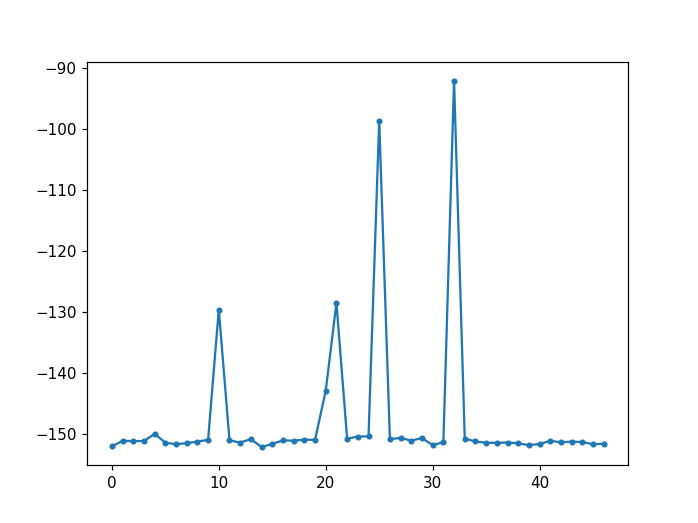

-147.7146029007733


In [13]:
plt.figure()
plt.plot(Palm_fs, label="FEL+Laser",marker='.')
print(np.mean(Palm_fs))


1.1576711989318582
(2000, 1)


<IPython.core.display.Javascript object>


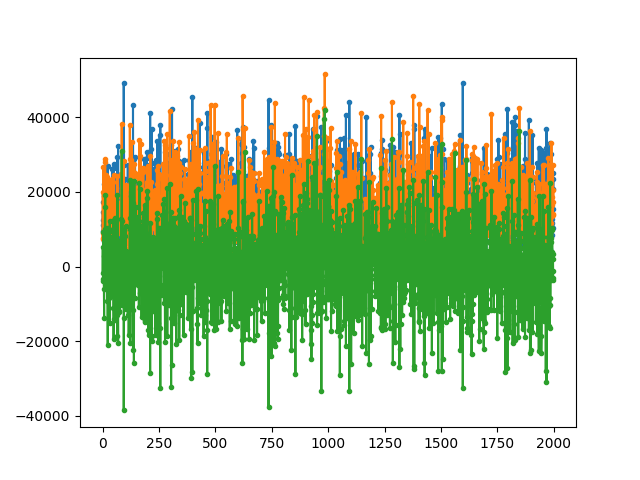

-159.45280198019645


In [161]:
print (signal_pump_loop.mean())
print (signal_unpump_loop.shape)
plt.figure()

plt.plot(Izero_pump_loop, label="FEL+Laser",marker='.')
plt.plot(Izero_unpump_loop, label="FEL+Laser",marker='.')
plt.plot(Izero_unpump_loop-Izero_pump_loop, label="FEL+Laser",marker='.')

print (Izero_pump_loop.mean()- Izero_unpump_loop.mean())

<IPython.core.display.Javascript object>


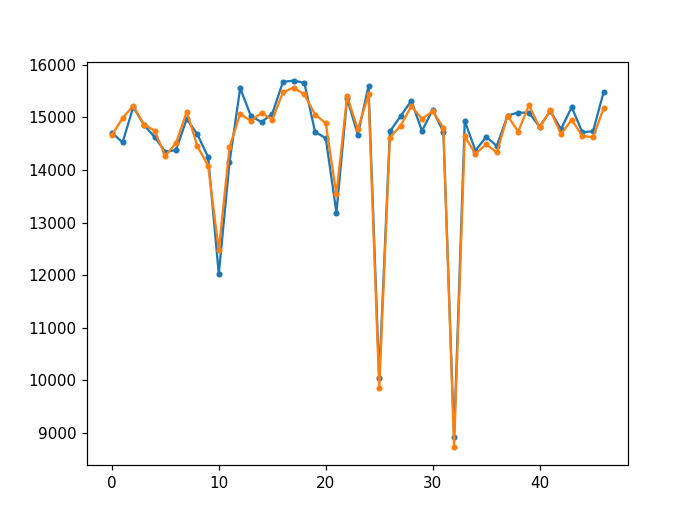

In [14]:
plt.figure()

plt.plot(Izero_pump, label="FEL+Laser",marker='.')
plt.plot(Izero_unpump, label="FEL+Laser",marker='.')

In [15]:
Signal_pump_norm = Signal_pump / Izero_pump
Signal_unpump_norm = Signal_unpump / Izero_unpump

SignalT_pump_norm = SignalT_pump / Izero_pump
SignalT_unpump_norm = SignalT_unpump / Izero_unpump

#Signal_pump_norm = np.log(-(Signal_pump / Izero_pump))
#Signal_unpump_norm = np.log(-(Signal_unpump / Izero_unpump))

err_signal_pump_norm = err_signal_pump / Izero_pump
err_signal_unpump_norm = err_signal_unpump / Izero_unpump

#err_signal_pump_relative_norm = err_signal_pump_relative / Izero_pump
#err_signal_unpump_relative_norm = err_signal_unpump_relative / Izero_unpump

#err_signalT_norm = err_signalT_pump / Izero_pump

In [114]:
# Optional to run --> it returns the maximum value of the trace
#m=max(Signal_pump_norm-Signal_unpump_norm)
#print(m)
#[i for i, j in enumerate(Signal_pump_norm-Signal_unpump_norm) if j==m] # returns the location in x axis indexes of the max
#print(Energy_eV[15])
#print(Position_mm)

<IPython.core.display.Javascript object>


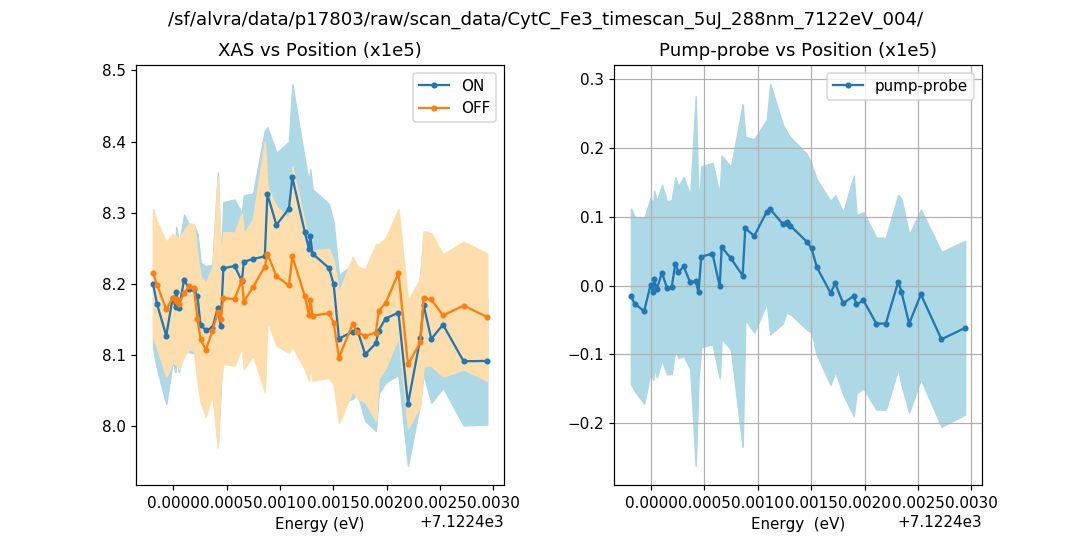

In [16]:
plt.figure(figsize = (10,5))
plt.suptitle(DIR, fontsize=12)
scale=1e5
#plt.title(DIR,horizontalalignment='right')
low_err_pump= Signal_pump_norm - err_signal_pump_norm
high_err_pump= Signal_pump_norm + err_signal_pump_norm
low_err_unpump= Signal_unpump_norm - err_signal_unpump_norm
high_err_unpump= Signal_unpump_norm + err_signal_unpump_norm

#low_err_diff= Signal_pump_norm-Signal_unpump_norm-0.01*np.sqrt(low_err_pump**2 + low_err_unpump**2)
#high_err_diff= Signal_pump_norm-Signal_unpump_norm+0.01*np.sqrt(high_err_pump**2 + high_err_unpump**2)

#low_err_diff= (Signal_pump_norm-Signal_unpump_norm) - err_signal_pump_relative_norm
#high_err_diff= (Signal_pump_norm-Signal_unpump_norm) + err_signal_unpump_relative_norm

low_err_diff= (Signal_pump_norm-Signal_unpump_norm) - np.sqrt(err_signal_pump_norm**2+err_signal_unpump_norm**2)
high_err_diff= (Signal_pump_norm-Signal_unpump_norm) + np.sqrt(err_signal_pump_norm**2+err_signal_unpump_norm**2)

plt.subplot(1,2,1)
plt.plot(Energy_eV, scale*Signal_pump_norm, label="ON",marker='.')
plt.plot(Energy_eV, scale*Signal_unpump_norm, label="OFF",marker='.')
plt.fill_between(Energy_eV, scale*low_err_pump, scale*high_err_pump, color='lightblue')
plt.fill_between(Energy_eV, scale*low_err_unpump, scale*high_err_unpump, color='navajowhite')
plt.xlabel("Energy (eV)")
plt.gca().set_title('XAS vs Position (x1e5)')
plt.legend(loc="best")

plt.subplot(1,2,2)
plt.plot(Energy_eV, scale*(Signal_pump_norm-Signal_unpump_norm), label="pump-probe",marker='.')
plt.fill_between(Energy_eV, scale*low_err_diff, scale*high_err_diff, color='lightblue')
plt.grid()
plt.xlabel("Energy  (eV)")
plt.gca().set_title('Pump-probe vs Position (x1e5)')
plt.legend(loc="best")
#plt.plot(Position_mm, [-0.00000005]*len(Energy_eV) , label="OFF")



#plt.xlabel("Energy (eV)")
plt.legend(loc="best")
plt.subplots_adjust(wspace = 0.3,hspace = 0.5) 

plt.show()

#plt.savefig('Timescan_7_diode')

<IPython.core.display.Javascript object>


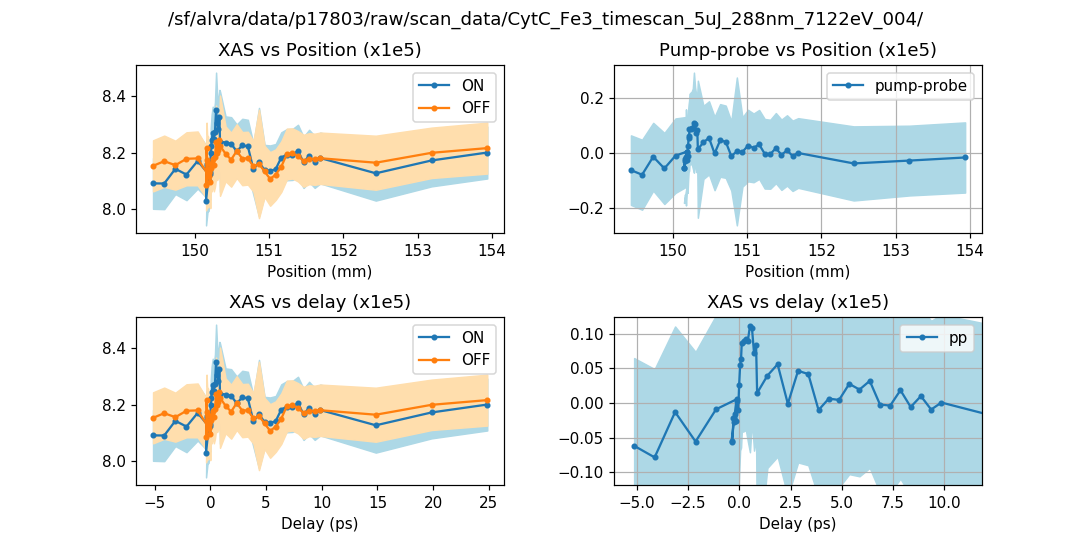

In [19]:
plt.figure(figsize = (10,5))
plt.suptitle(DIR, fontsize=12)
scale=1e5
#plt.title(DIR,horizontalalignment='right')
#low_err_pump= Signal_pump_norm - err_signal_pump_norm
#high_err_pump= Signal_pump_norm + err_signal_pump_norm
#low_err_unpump= Signal_unpump_norm - err_signal_unpump_norm
#high_err_unpump= Signal_unpump_norm + err_signal_unpump_norm

#low_err_diff= Signal_pump_norm-Signal_unpump_norm-0.01*np.sqrt(low_err_pump**2 + low_err_unpump**2)
#high_err_diff= Signal_pump_norm-Signal_unpump_norm+0.01*np.sqrt(high_err_pump**2 + high_err_unpump**2)

#low_err_diff= (Signal_pump_norm-Signal_unpump_norm) - err_signal_pump_relative_norm
#high_err_diff= (Signal_pump_norm-Signal_unpump_norm) + err_signal_unpump_relative_norm

plt.subplot(2,2,1)
plt.plot(Position_mm, scale*Signal_pump_norm, label="ON",marker='.')
plt.plot(Position_mm, scale*Signal_unpump_norm, label="OFF",marker='.')
plt.fill_between(Position_mm, scale*low_err_pump, scale*high_err_pump, color='lightblue')
plt.fill_between(Position_mm, scale*low_err_unpump, scale*high_err_unpump, color='navajowhite')
plt.xlabel("Position (mm)")
plt.gca().set_title('XAS vs Position (x1e5)')
plt.legend(loc="best")

plt.subplot(2,2,2)
plt.plot(Position_mm, scale*(Signal_pump_norm-Signal_unpump_norm), label="pump-probe",marker='.')
plt.fill_between(Position_mm, scale*low_err_diff, scale*high_err_diff, color='lightblue')
plt.grid()
plt.xlabel("Position (mm)")
plt.gca().set_title('Pump-probe vs Position (x1e5)')
plt.legend(loc="best")
#plt.plot(Position_mm, [-0.00000005]*len(Energy_eV) , label="OFF")

plt.subplot(2,2,3)
plt.plot(Delay_ps, scale*Signal_pump_norm, label="ON",marker='.')
plt.plot(Delay_ps, scale*Signal_unpump_norm, label="OFF",marker='.')
plt.fill_between(Delay_ps, scale*low_err_pump, scale*high_err_pump, color='lightblue')
plt.fill_between(Delay_ps, scale*low_err_unpump, scale*high_err_unpump, color='navajowhite')
plt.xlabel("Delay (ps)")
plt.gca().set_title('XAS vs delay (x1e5)')
plt.legend(loc="best")

plt.subplot(2,2,4)
plt.plot(Delay_ps, scale*(Signal_pump_norm-Signal_unpump_norm), label="pp",marker='.')
plt.fill_between(Delay_ps, scale*low_err_diff, scale*high_err_diff, color='lightblue')
plt.grid()
plt.xlabel("Delay (ps)")
plt.gca().set_title('XAS vs delay (x1e5)')


#plt.xlabel("Energy (eV)")
plt.legend(loc="best")
plt.subplots_adjust(wspace = 0.3,hspace = 0.5) 

plt.show()

#plt.savefig('Timescan_7_diode')

In [72]:
# Now fit with error funciton (defined above)
Signal_norm = Signal_pump_norm-Signal_unpump_norm
parameters,extras = curve_fit(errfunc, Position_mm, Signal_norm, p0 = [0, 0.1, 150.39, 0.05]) # [baseline, step amplitude, center, FWHM]

print("Position t0 =",np.abs(np.round(parameters[2],3)),"mm")
print("Width =",np.abs(np.round(parameters[3],3)),"mm")

Position t0 = 151.614 mm
Width = 0.445 mm


<IPython.core.display.Javascript object>


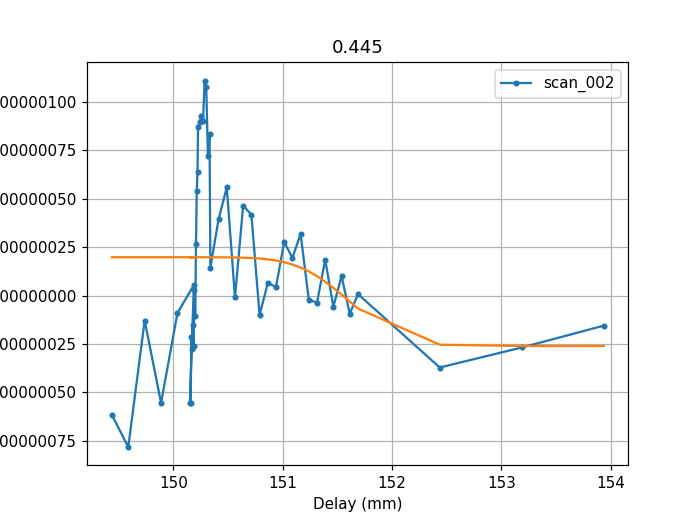

In [73]:
#... and the plot with the fit curve

#savedir = "/das/work/p17/p17569/Beamline/"

plt.figure()

plt.plot(Position_mm, Signal_norm, label="scan_002",marker='.')
plt.plot(Position_mm, errfunc(Position_mm,*parameters))

#low_err= Signal_norm - err_signal_norm
#high_err= Signal_norm + err_signal_norm
#plt.fill_between(Position_mm, low_err, high_err, color='lightblue')

plt.title(np.round(parameters[3], 3) )
plt.grid()
plt.xlabel("Delay (mm)")
plt.legend(loc="best")
plt.show()
#plt.savefig(savedir + 'scan_LAM_003')

In [18]:
myList = np.concatenate((np.arange(7100,7105,1), np.arange(7105,7120,0.5), np.arange(7120,7160,1),np.arange(7160,7200,3)))

In [103]:
myList

NameError: name 'myList' is not defined

In [560]:
time_zero = 150.188         #this is in mm from the delay scans

desidered_delays = [-10,-1,1]  
#choose this in ps

delay_to_set = (100/(2*333))*desidered_delay + time_zero        #factor of 2 because of the delay stage

desidered_delay + time_zero
print ("To be at",desidered_delay,"ps, put the laser pump delay stage to",np.round(delay_to_set,4),"mm")


T_1 = np.arange(149.4372,150.1872


mtime = np.concatenate((np.arange(149.4372,7105,1), np.arange(7105,7120,0.5), np.arange(7120,7160,1),np.arange(7160,7200,3)))

In [561]:
print(time_zero)

150.295


In [ ]:
desidered_delays = [-10,-1,1]  


In [85]:
Position_mm

delay_ps = (Position_mm - 150.188)*2/(3e8*1e3*1e-12)
print(delay_ps)

[-5.00533552 -4.00533186 -3.00532519 -2.00533486 -1.00534287 -0.24999255
 -0.20332353 -0.15667619 -0.10999984 -0.06332083 -0.01666048  0.0299942
  0.07664888  0.12331189  0.17000857  0.21667292  0.25000578  0.35001538
  0.44999765  0.55001325  0.65001152  0.75000445  0.85001405  0.95001498
  1.00133936  1.50135569  2.00135236  2.50133269  3.00132902  3.50134502
  4.00130935  4.50133368  5.00133201  5.50134601  6.00132801  6.50133234
  7.00134667  7.50135134  8.00131634  8.50131533  9.00130167  9.50133066
 10.00130766]
